<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

# My Code


## Prepare

In [5]:
# Clean the dataframe
boston_df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
boston_df.set_index('index', inplace=True)

## Task 2 - Generate Descriptitve Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

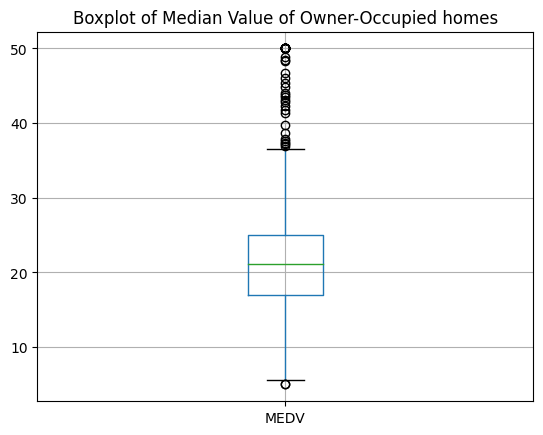

In [6]:
## Per definition: MEDV - Median value of owner-occupied homes in $1000's

boston_df.boxplot(column =['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied homes')
plt.show()

#### Provide a  bar plot for the Charles river variable


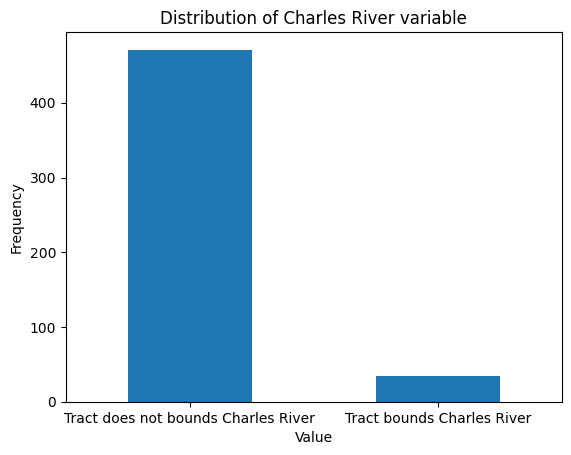

In [7]:
## Per definition: CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# Map clearer values from column CHAS
boston_df['CHAS_execSum'] = boston_df['CHAS'].map({0: 'Tract does not bounds Charles River', 1: 'Tract bounds Charles River'})

# Calculate counts per value
CHAS_execSum_value_counts = boston_df['CHAS_execSum'].value_counts()

# Create bar plot
CHAS_execSum_value_counts.plot.bar(title='Distribution of Charles River variable')

# Aplicar rotação aos rótulos dos ticks do eixo x
plt.xticks(rotation=0)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

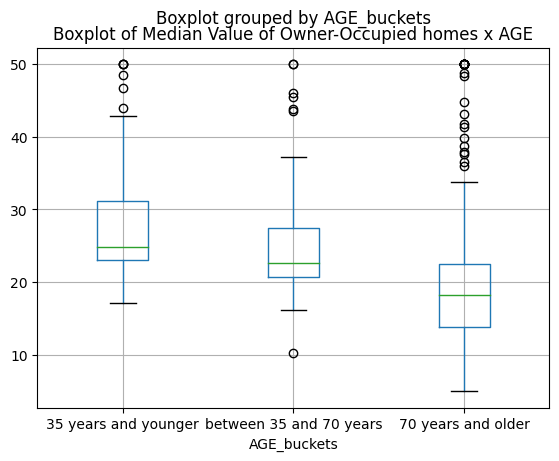

In [8]:
## Per definition: MEDV - Median value of owner-occupied homes in $1000's
## Per definition: AGE - proportion of owner-occupied units built prior to 1940

# Function to assess each line and return bucket
def categorize_age(age):
    if age <= 35:
        return '35 years and younger'
    elif age < 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'

# Discretizeing the AGE variable into three groups
boston_df['AGE_buckets'] = boston_df['AGE'].apply(categorize_age)

# Reordering AGE buckets
age_order = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_buckets'] = pd.Categorical(boston_df['AGE_buckets'], categories=age_order, ordered=True)

# Creating a boxplot
boston_df.boxplot(by='AGE_buckets', column =['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied homes x AGE')
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

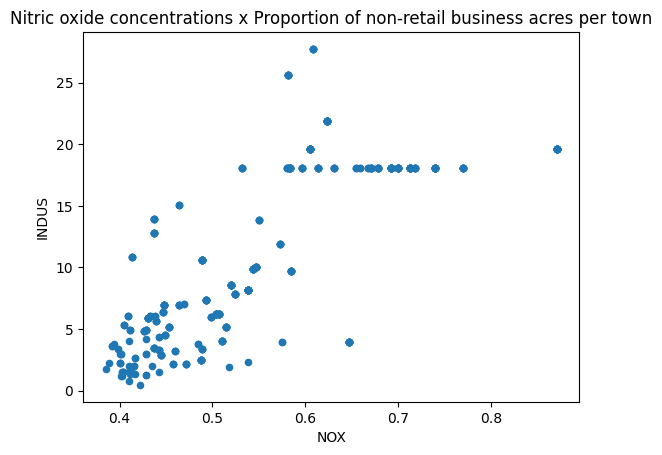

Conclusion: It seems there is a direct relationship between both variables


In [9]:
## Per definition: NOX - nitric oxides concentration (parts per 10 million)
## Per definition: INDUS - proportion of non-retail business acres per town

boston_df.plot.scatter(x='NOX', y='INDUS')
plt.title('Nitric oxide concentrations x Proportion of non-retail business acres per town')
plt.show()

print("Conclusion: It seems there is a direct relationship between both variables")

In [10]:
boston_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

### Create a histogram for the pupil to teacher ratio variable

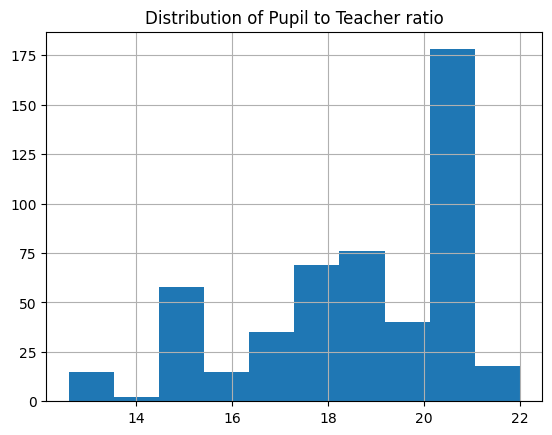

In [11]:
## Per definition: PTRATIO - pupil-teacher ratio by town

boston_df.hist(column='PTRATIO', bins=10)
plt.title('Distribution of Pupil to Teacher ratio')
plt.show()

## Task 3 - Appropriate tests to answer questions

Considering: Alpha = 0.05

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

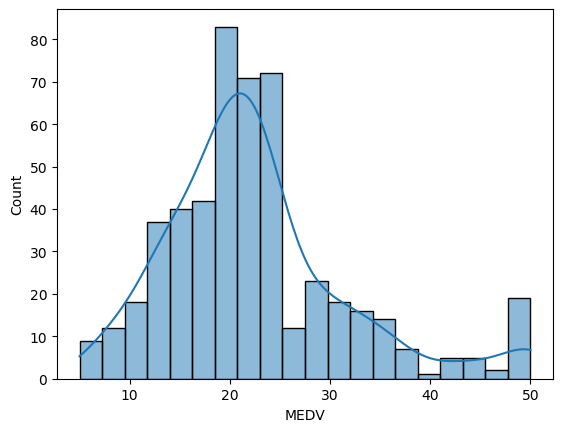

Conclusion: We can assume it is Normally distributed (with a slight right skew


In [12]:
## Variables:
    # MEDV - Median value of owner-occupied homes in $1000's: dependent continuous variable
    # CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise): independent categorical variable

# Hypotheses:
    # H0 = Mean_0 = Mean_1: there is no difference in value of houses between those bounded by Charles River or not
    # H1 = Mean_0 != Mean_1: there is a difference in value of houses between those bounded by Charles River or not

# Assessing the distribution of the continous variable
sns.histplot(data=boston_df, x="MEDV", bins=20, kde=True)
plt.show()

print("Conclusion: We can assume it is Normally distributed (with a slight right skew")

In [13]:
# Applying Levente's Test to check test significance

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can not assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [14]:
# Applying T-Test with non equal variance
t_stat, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                        boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("\nConclusion:\nThere is a significant difference in the median value of houses bounded by Charles River and those there are not.")
else:
    print("\nConclusion:\nThere is NO significant difference in the median value of houses bounded by Charles River and those there are not.")

T-statistic: -3.113291312794837
P-value: 0.003567170098137517

Conclusion:
There is a significant difference in the median value of houses bounded by Charles River and those there are not.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [15]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [16]:
## Variables:
    # MEDV - Median value of owner-occupied homes in $1000's: dependent continuous variable
    # AGE - proportion of owner-occupied units built prior to 1940: independent CONTINUOUS variable

# First, we must categorize the AGE variable into three buckets (per Task 2)
# Discretized AGE variable into three groups (refer Task 2)
boston_df['AGE_buckets'].unique()

# Hypotheses:
    # H0 = Mean_0 = Mean_1 = Mean_2: the three population means are equal
    # H1: at least one of the means differ 

['between 35 and 70 years', '70 years and older', '35 years and younger']
Categories (3, object): ['35 years and younger' < 'between 35 and 70 years' < '70 years and older']

In [17]:
# Applying Levente's Test to check test significance
scipy.stats.levene(boston_df[boston_df['AGE_buckets'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_buckets'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['AGE_buckets'] == '70 years and older']['MEDV'],
                   center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [18]:
# Separating each sample into a variable
thirtyfive_younger = boston_df[boston_df['AGE_buckets'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_buckets'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_buckets'] == '70 years and older']['MEDV']

# Running a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

print("Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [19]:
boston_df['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

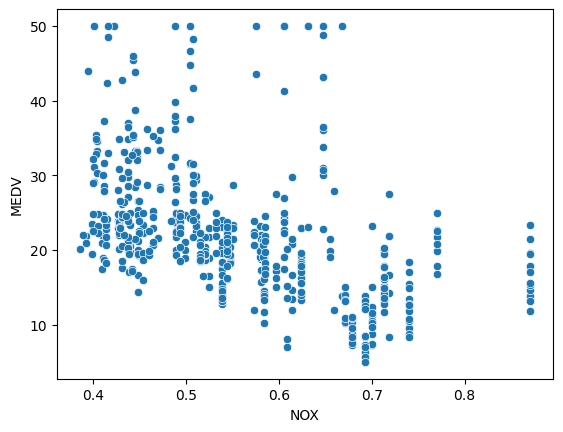

Conclusion: We reject the Null hypothesis and conclude there IS a relationship between MEDV and NOX, a decreasing one (the higher NOX the lower MEDV)


In [20]:
## Variables:
    # MEDV - Median value of owner-occupied homes in $1000's: dependent continuous variable
    # NOX - nitric oxides concentration (parts per 10 million): independent CONTINUOUS variable

# Hypotheses:
    # H0: there is no relationship between NOX and MEDV
    # H1: there is a relationship between NOX and MEDV

ax = sns.scatterplot(x="NOX", y="MEDV", data=boston_df)
plt.show()

scipy.stats.pearsonr(boston_df['MEDV'], boston_df['NOX'])

print('Conclusion: We reject the Null hypothesis and conclude there IS a relationship between MEDV and NOX, a decreasing one (the higher NOX the lower MEDV)')

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [21]:
## Variables:
    # MEDV - Median value of owner-occupied homes in $1000's: dependent continuous variable
    # DIS - weighted distances to five Boston employment centres: independent CONTINUOUS variable

# Hypotheses:
    # H0: there is no relationship between NOX and MEDV
    # H1: there is a relationship between NOX and MEDV



## X is the input variable (independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.21e-08
Time:                        17:25:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print('Conclusion: p-value is Prob (F-statistic): 1.21e-08, thus less than 5% and rejecting the null hypothesis. There is evidence of correlation between MEDV and DIS.')

Conclusion: p-value is Prob (F-statistic): 1.21e-08, thus less than 5% and rejecting the null hypothesis. There is evidence of correlation between MEDV and DIS.
